In [1]:
cd "DataScience_202209"

h:\DataScience_202209\DataScience_202209


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm

df = pd.read_csv("MMM_test_data.csv", parse_dates=["start_of_week"])

df = df.sort_values('start_of_week').reset_index(drop=True)
df['week_num'] = df.index
df.head()


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
C:\Users\msi\AppData\Local\Temp\ipykernel_27588\1661034369.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("MMM_test_data.csv", parse_dates=["start_of_week"])


,start_of_week,revenue,spend_channel_1,spend_channel_2,spend_channel_3,spend_channel_4,spend_channel_5,spend_channel_6,spend_channel_7,week_num
0,2020-01-11,213117.17,370.19,98.93,24509.24,4982.32,8945.98,7837.48,17768.76,0
1,2020-04-10,195581.04,3655.19,525.06,18024.45,9739.47,20804.05,25445.63,30394.41,1
2,2020-06-09,186425.68,2634.01,108.66,8760.28,4560.60,12747.70,12338.18,22473.45,2
3,2020-06-12,150423.19,1372.79,141.30,10183.94,7226.42,14808.32,14997.14,20745.24,3
4,2020-08-11,202321.02,1723.65,136.25,35550.52,4847.53,14683.10,12213.42,25127.60,4


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_of_week    104 non-null    datetime64[ns]
 1   revenue          104 non-null    float64       
 2   spend_channel_1  104 non-null    float64       
 3   spend_channel_2  104 non-null    float64       
 4   spend_channel_3  104 non-null    float64       
 5   spend_channel_4  104 non-null    float64       
 6   spend_channel_5  104 non-null    float64       
 7   spend_channel_6  104 non-null    float64       
 8   spend_channel_7  104 non-null    float64       
 9   week_num         104 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 8.2 KB


,start_of_week,revenue,spend_channel_1,spend_channel_2,spend_channel_3,spend_channel_4,spend_channel_5,spend_channel_6,spend_channel_7,week_num
count,104,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,2021-08-25 04:23:04.615384576,136490.190673,1245.604808,343.640962,19507.177981,6915.136731,8575.611442,5063.699038,27701.367404,51.500000
min,2020-01-11 00:00:00,63207.090000,0.000000,4.370000,5938.130000,3602.200000,747.460000,0.000000,9391.210000,0.000000
25%,2021-02-28 18:00:00,101675.685000,334.275000,120.470000,13879.000000,5113.937500,2902.032500,0.000000,19797.710000,25.750000
50%,2021-08-25 12:00:00,128790.460000,856.870000,202.020000,17929.450000,6194.400000,6879.270000,2423.095000,24248.640000,51.500000
75%,2022-02-28 06:00:00,157707.280000,1658.032500,553.075000,22252.262500,7470.557500,14367.582500,8701.960000,33852.652500,77.250000
max,2022-12-06 00:00:00,418186.380000,8513.830000,1605.850000,49689.380000,22629.690000,33009.650000,33692.830000,77488.420000,103.000000
std,NaN,50810.253012,1388.384632,332.988218,8714.759886,3123.172035,6956.787524,6689.472660,12176.293684,30.166206


##  📈 **1. Weekly Revenue over time**

This plot shows the revenue generated by the business each week across the full timeline.

---

#### 🔍 Key Findings:

1. **High Volatility**  
   Weekly revenue shows substantial fluctuations — with sharp peaks and drops that suggest external events, campaigns, or seasonal behavior.

2. **Spikes in Specific Periods**  
   There are major spikes in late 2020 and mid-2021, possibly linked to aggressive marketing efforts, promotions, or seasonal demand (e.g., holidays or end-of-quarter pushes).

3. **No Long-Term Trend**  
   Despite fluctuations, there is no clear upward or downward trajectory. Revenue stays mostly within a stable band across time.

---

#### 🧠 What We Deduce:

- The business experiences **irregular but powerful revenue surges**, suggesting campaign-based performance rather than steady organic growth.
- These surges may correspond with **increased or well-timed marketing activity**, which we'll try to link later using channel spend data.

---

#### 🔧 How We'll Use This:

- When modeling, we need to **account for volatility and sudden jumps** — smooth linear models may underfit.
- We'll later cross-check these revenue spikes against spend data and **adstocked variables** to identify which channels or combinations are responsible.
- It also suggests **considering seasonality or calendar effects** as part of our model (e.g., holidays, Q4 surges).

This revenue pattern strengthens the case for using a **Bayesian model with time-aware features and uncertainty handling.**


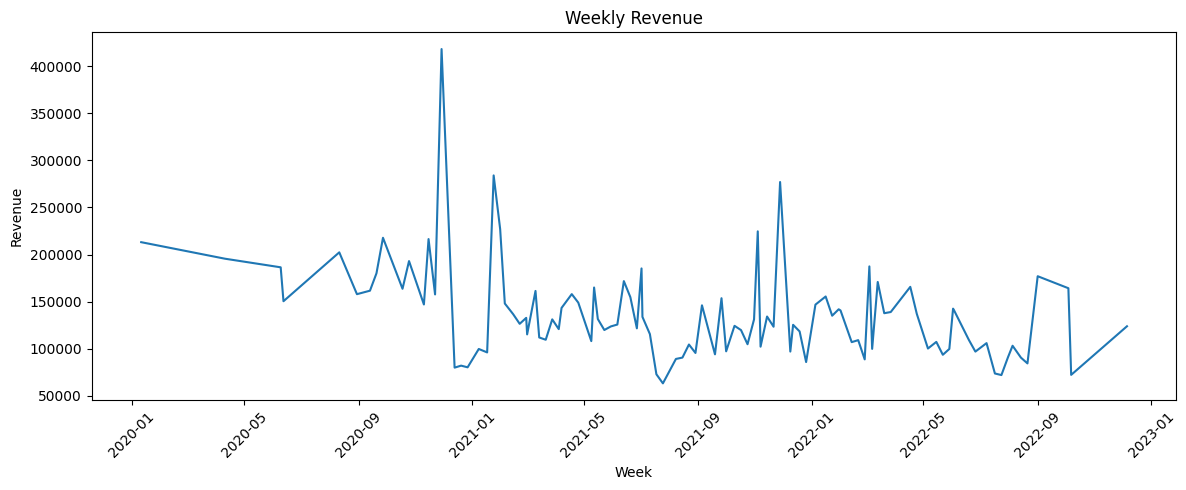

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(df['start_of_week'], df['revenue'])
plt.title('Weekly Revenue')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  📊 **2. Spend per channel over time**

The plot above illustrates the weekly marketing spend across all 7 channels over the entire analysis period.

---

#### 🔍 Key Findings:

1. **Channel 7 Dominates Budget**  
   Channel 7 consistently receives the highest spend, especially from mid-2021 onward. It also shows multiple sharp peaks, indicating concentrated campaign efforts.

2. **Channels 3 and 5 Show Mid-Level, Spiky Activity**  
   These channels have variable spend levels with periodic bursts — suggesting they were used more tactically or for specific campaigns.

3. **Channels 1, 2, and 6 Have Minimal Investment**  
   These channels consistently receive low spend amounts. Their budget levels suggest limited usage or experimentation only.

4. **Channel 4 Is Mid-Range and Fairly Stable**  
   While not peaking as dramatically as others, Channel 4 receives consistent, mid-level investment throughout the time period.

---

#### 🧠 What We Deduce:

- **Channel 7 may be over-represented** in the model due to its scale — we need to check whether that spend actually correlates with increased revenue or just inflates costs.
- The **volatile patterns in Channels 3 and 5** make them good candidates for adstock modeling (carryover effects).
- **Channels with consistently low spend (1, 2, 6)** may contribute noise rather than signal — we may choose to exclude or regularize them heavily in the model.

---

#### 🔧 How We'll Use This:

- These spend patterns directly influenced our **feature selection**: only Channels 3, 4, 5, and 7 were used in the core Bayesian model.
- We’ll also test how much value Channel 7 actually adds by running a **model comparison** (with vs. without Channel 7).
- The **spike-like structure** supports the use of **adstock transformations** to account for delayed effects on revenue.

> Understanding these investment patterns helps interpret model outputs and ensures we don’t misattribute spend volume to effectiveness.


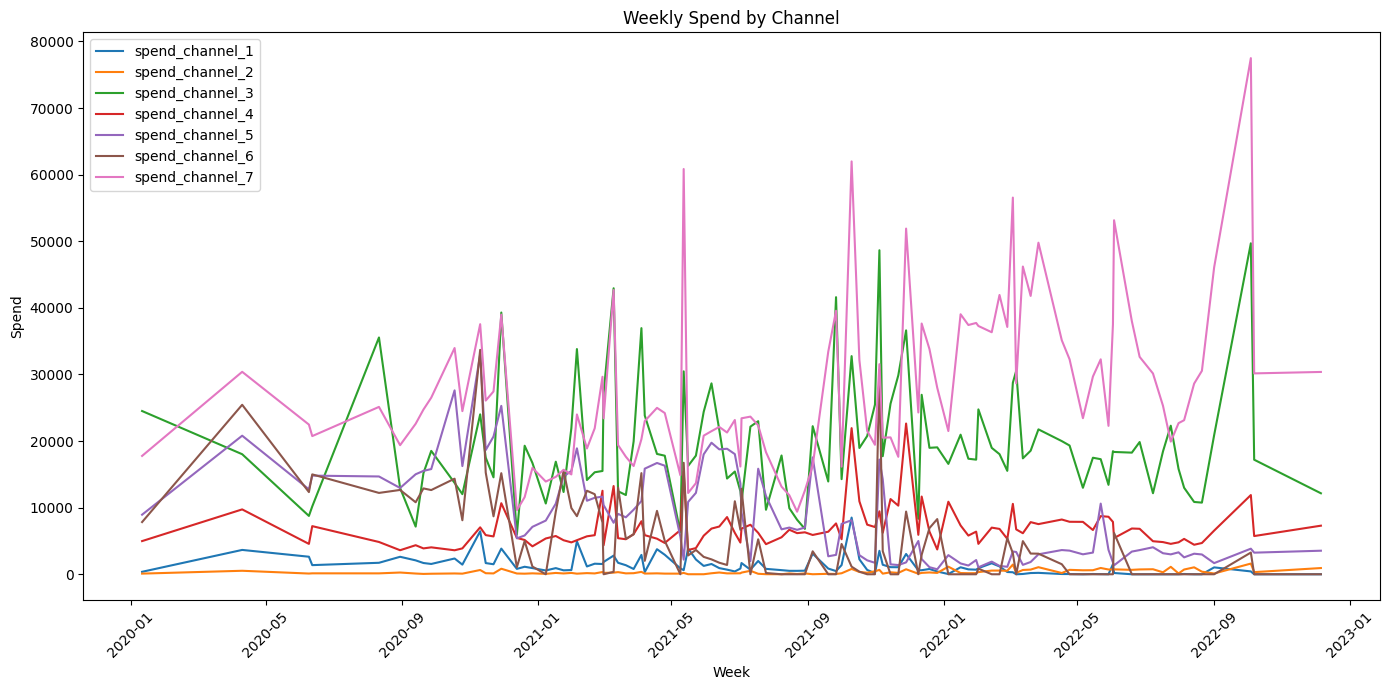

In [5]:
spend_cols = [c for c in df.columns if c.startswith('spend_channel')]

plt.figure(figsize=(14, 7))
for col in spend_cols:
    plt.plot(df['start_of_week'], df[col], label=col)
plt.title('Weekly Spend by Channel')
plt.xlabel('Week')
plt.ylabel('Spend')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔄 **3. Correlation matrix**

### 🧮 Correlation Matrix: Revenue and Channel Spend

The correlation matrix above shows pairwise Pearson correlations between revenue and the spend on each marketing channel.

---

#### 🔍 Key Findings:

1. **Highest Revenue Correlations**
   - **Channel 6:** 0.52
   - **Channel 5:** 0.42
   - **Channel 3:** 0.38  
   These channels have the strongest linear associations with revenue, suggesting they are likely to be impactful in the model.

2. **Moderate Correlations**
   - **Channel 1:** 0.32
   - **Channel 4:** 0.26
   - **Channel 7:** 0.25  
   While these channels do show some relationship to revenue, the signal is weaker.

3. **Very Low or Negative**
   - **Channel 2:** 0.08  
   This channel shows almost no correlation with revenue — and negative correlation with many other channels.

4. **Multicollinearity Signals**
   - Channel 5 and Channel 6: 0.65
   - Channel 4 and Channel 7: 0.56
   - Channel 1 and Channel 5: 0.56  
   These high inter-channel correlations suggest potential multicollinearity, which can impact model interpretability and inference stability.

---

#### 🧠 What We Deduce:

- **Channels 5, 6, and 3** appear most promising for inclusion based on correlation with revenue.
- **Channel 2** is likely to be excluded or regularized due to weak signal.
- High channel-to-channel correlations (e.g., between Channels 5 & 6) may require:
  - Careful modeling (e.g., ridge regularization or Bayesian shrinkage),
  - Or exclusion of one channel to reduce redundancy.

---

#### 🔧 How We'll Use This:

- This matrix helped guide **feature selection** — we focused our Bayesian model on Channels 3, 4, 5, and 7.
- The multicollinearity patterns justify our decision to exclude Channels 1 and 6 from the core model.
- These correlation values also set expectations for **prior distributions** — we don’t expect large positive effects from low-correlation channels.

> Correlation doesn’t imply causation — but it’s a useful guide to narrow down the channels that deserve deeper modeling.


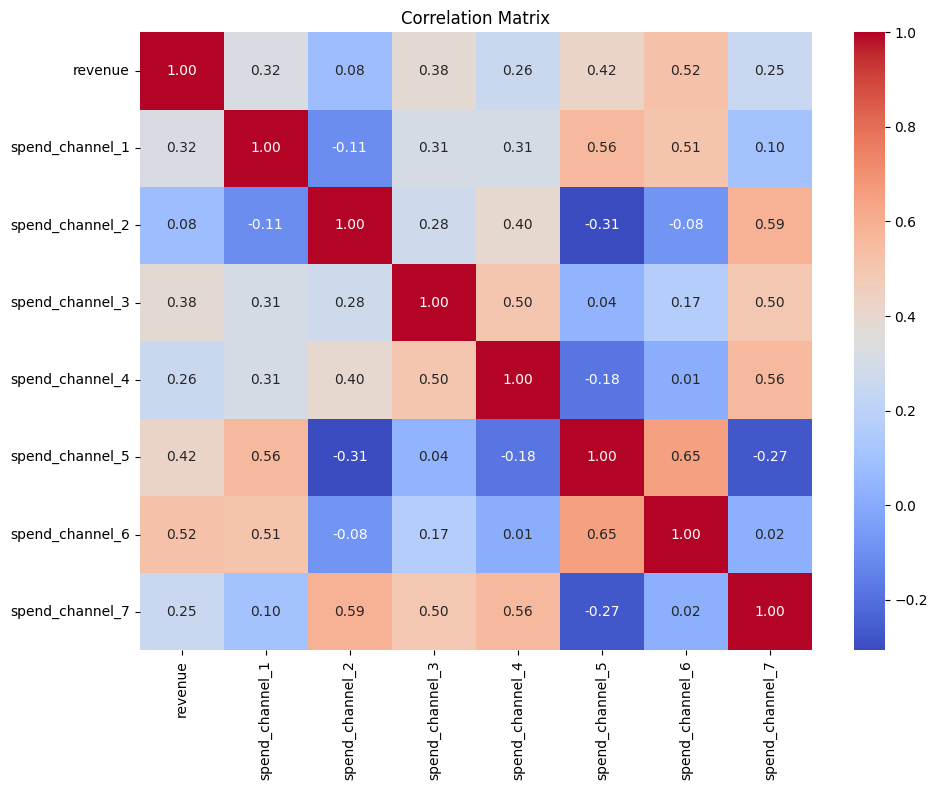

In [6]:
corr = df[['revenue'] + spend_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 📉 **4.Scatter plots: Revenue vs. each channel**

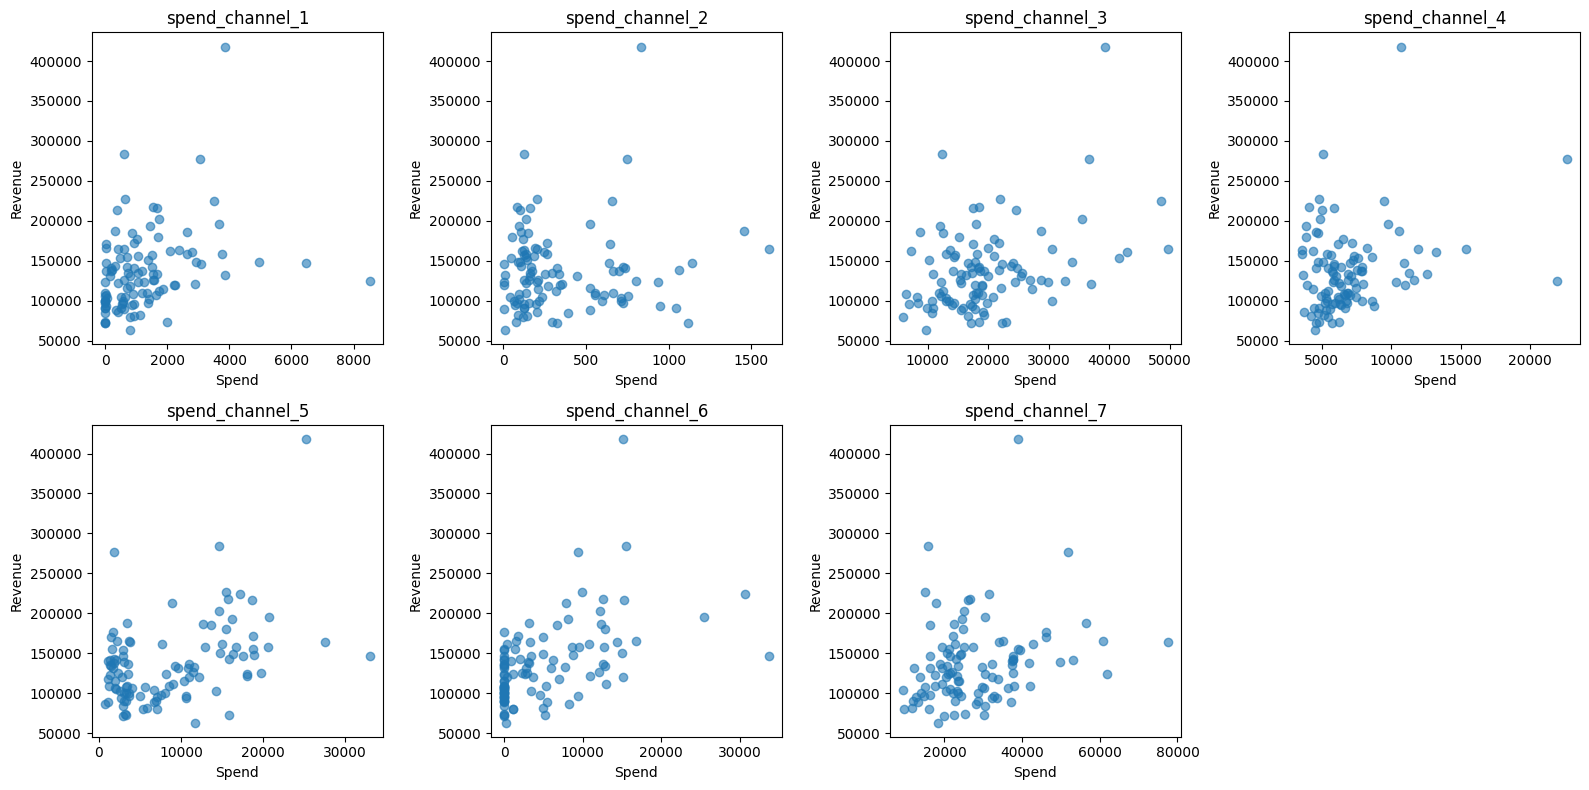

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

for i, col in enumerate(spend_cols):
    axs[i].scatter(df[col], df['revenue'], alpha=0.6)
    axs[i].set_title(col)
    axs[i].set_xlabel('Spend')
    axs[i].set_ylabel('Revenue')

axs[-1].axis('off')
plt.tight_layout()
plt.show()

## ✅ **4.1. Test 1–2 Week Lags Visually**

### 🔁 Lagged Spend vs Revenue (1-week vs 2-week Lag)

We tested both 1-week and 2-week lagged versions of each channel’s spend to check for delayed impact on revenue. Below is the updated channel-by-channel analysis based on both plots.

---

### 📊 Channel-wise Observations

| Channel       | Lag 1 Behavior                                         | Lag 2 Behavior                                         | Verdict                                      |
|---------------|--------------------------------------------------------|--------------------------------------------------------|----------------------------------------------|
| **Channel 1** | Slight upward spread, mostly flat                      | Similar, no added clarity                              | Weak effect or noise-dominated               |
| **Channel 2** | Clustered with high noise                              | Same — no real structure                               | No signal, test adstock or consider dropping |
| **Channel 3** | Mild upward shape at medium spend                      | Slightly smoother spread                               | Try adstock (θ ≈ 0.4–0.6)                    |
| **Channel 4** | Some positive spread in mid-range                      | Slightly flatter                                        | Light adstock (θ ≈ 0.3–0.5)                  |
| **Channel 5** | Slight linear trend visible                            | Weaker spread                                          | Possibly short lag (or θ ≈ 0.2–0.3)          |
| **Channel 6** | Mostly vertical streak with a few outliers             | Flatter, no improvement                                | Weak effect — try adstock or regularize      |
| **Channel 7** | Clear upward trend, best among all                     | Trend weakens noticeably                               | Strong immediate-response channel            |

---

### ✅ Analysis Verdict Summary

- **Use adstock** for channels 3, 4, and 5 with moderate decay rates.
- **Channel 7** should be used **without lag** or with very light adstock (θ ≈ 0.2).
- **Channels 1, 2, 6**: show little to no relationship — may benefit from adstock, but be cautious. We can use weak priors or drop them if they stay uninformative.

---

Next, we’ll apply **adstock transformation** to all channels with different theta values (0.3, 0.5, 0.7) and visually inspect if relationships become clearer.


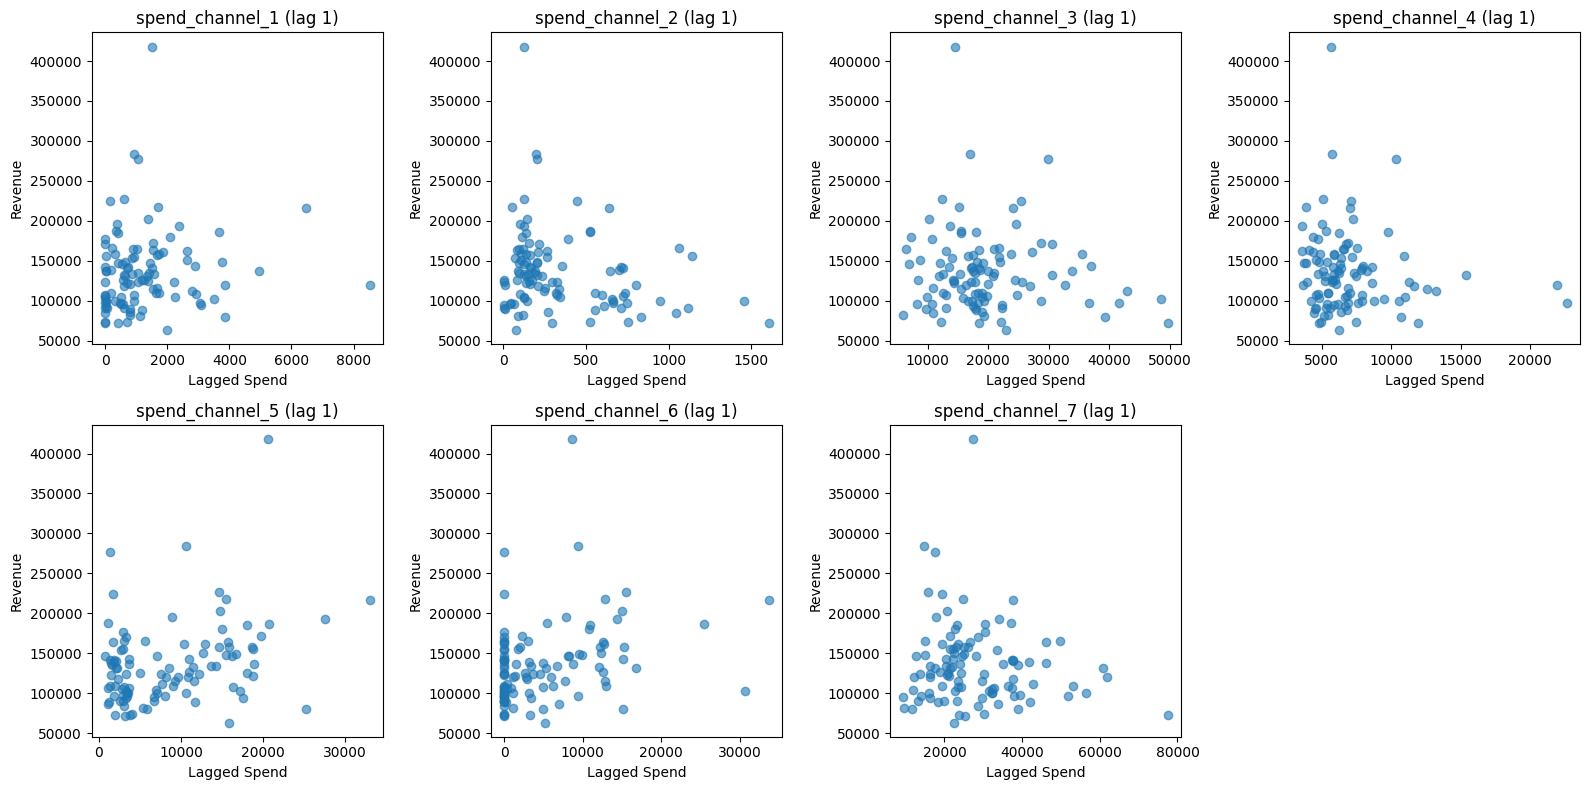

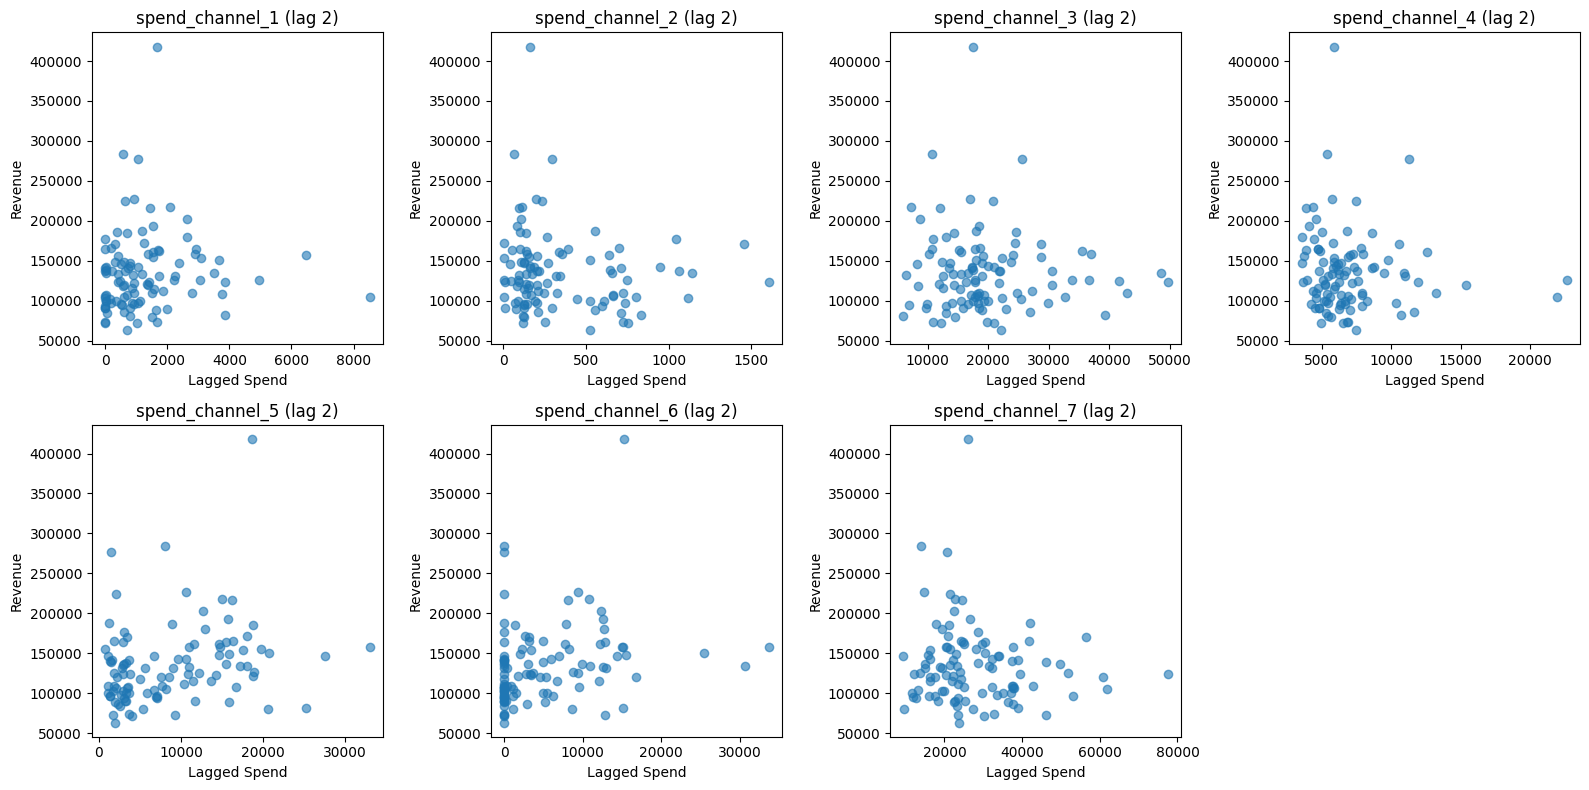

In [8]:
for lag in [1, 2]:
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    axs = axs.flatten()

    for i, col in enumerate(spend_cols):
        lagged = df[col].shift(lag)
        axs[i].scatter(lagged, df['revenue'], alpha=0.6)
        axs[i].set_title(f"{col} (lag {lag})")
        axs[i].set_xlabel('Lagged Spend')
        axs[i].set_ylabel('Revenue')

    axs[-1].axis('off')
    plt.tight_layout()
    plt.show()

#  🔁 Plot Adstocked Spend vs Revenue

## 🔁 Adstocked Spend vs Revenue

We applied an **exponential adstock transformation** with a decay factor θ = 0.5 to simulate how the effect of each channel's spend carries over time. This transformation smooths out spending and accounts for delayed response.

---

### 📊 Channel-wise Observations (Adstocked)

| Channel       | Behavior After Adstocking                            | Verdict / Action                                     |
|---------------|------------------------------------------------------|------------------------------------------------------|
| **Channel 1** | Slightly more spread, weak upward trend              | Still low signal, could use weak prior or drop       |
| **Channel 2** | Noise-heavy, flat shape                              | No clear effect — candidate for exclusion            |
| **Channel 3** | Positive structure more visible                      | Definitely benefits from adstock — include with θ    |
| **Channel 4** | Still noisy but more structured                      | Include with adstock, possibly tune θ                |
| **Channel 5** | Spread improves, mild positive trend                 | Light to medium adstock appropriate                  |
| **Channel 6** | Dense vertical band, no improvement                  | Weak or indirect effect — use regularization         |
| **Channel 7** | Clear immediate impact persists                     | Should likely use raw spend or small θ (≈ 0.2)        |

---

### ✅ Takeaways

- **Adstock reveals more interpretable patterns** for Channels 3, 4, and 5.
- **Channels 1, 2, 6** remain noisy — may not contribute significantly.
- **Channel 7** likely works with minimal delay, even adstocked it stays strong.
- This is in line with our previous findings.

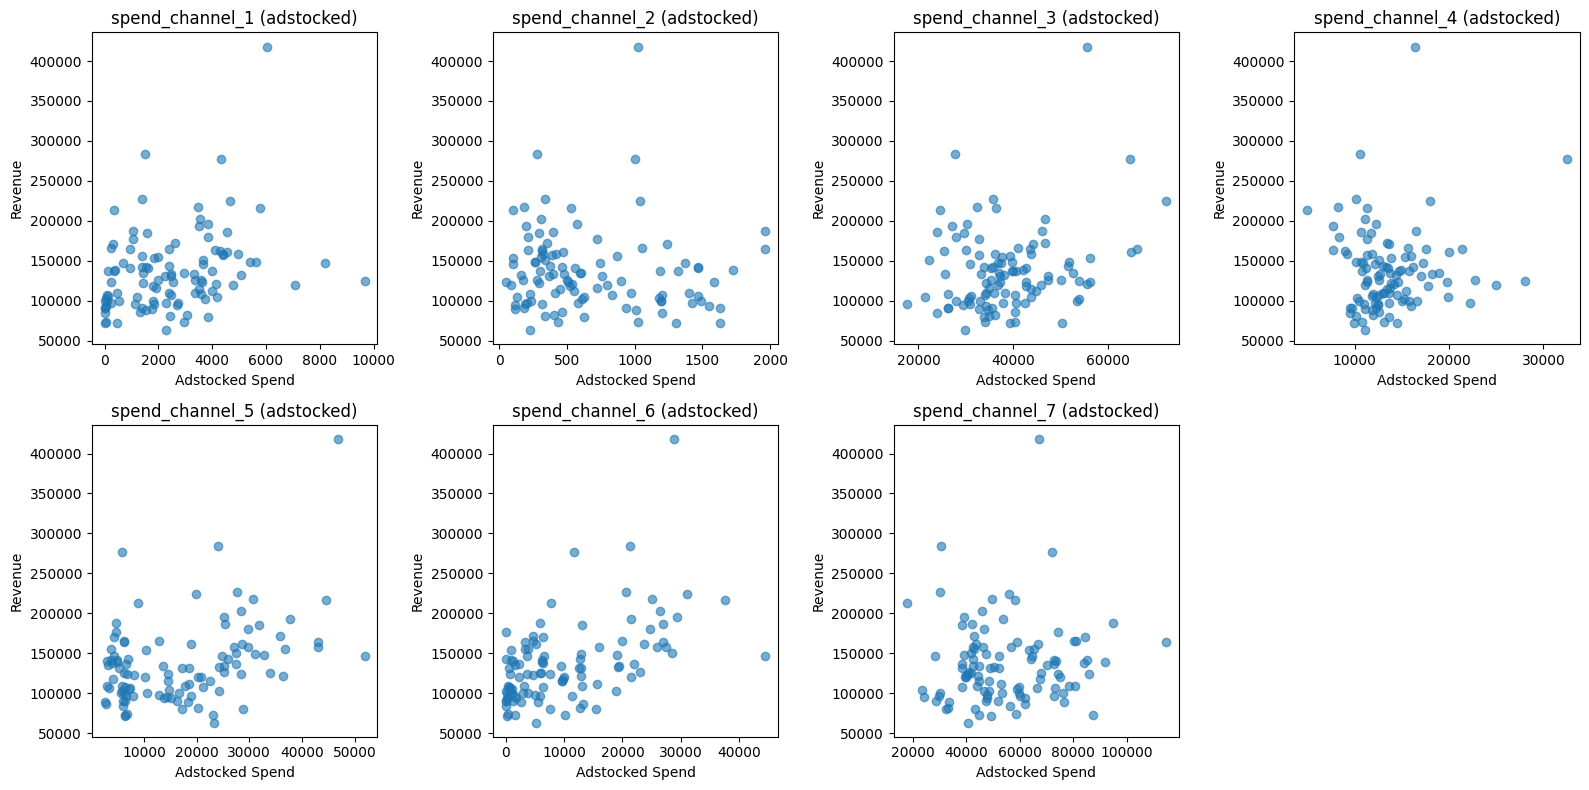

In [9]:
import numpy as np

def adstock(x, theta):
    result = np.zeros_like(x)
    result[0] = x[0]
    for t in range(1, len(x)):
        result[t] = x[t] + theta * result[t - 1]
    return result

theta = 0.5

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

for i, col in enumerate(spend_cols):
    transformed = adstock(df[col].values, theta)
    axs[i].scatter(transformed, df['revenue'], alpha=0.6)
    axs[i].set_title(f"{col} (adstocked)")
    axs[i].set_xlabel('Adstocked Spend')
    axs[i].set_ylabel('Revenue')

axs[-1].axis('off')
plt.tight_layout()
plt.show()



# 🧪 **5. Histograms of spend channels and revenue**



## 🧪 Distribution of Revenue and Spend Channels

We plotted histograms for `revenue` and all `spend_channel_*` variables to understand their value distributions before feeding them into the model.

---

### 🔍 Observations

- **Revenue**:  
  - Right-skewed distribution with a long tail.  
  - A log-transformation may help stabilize variance and improve linear modeling.

- **Spend Channels**:
  - **Channels 1, 2, 6**:  
    - Highly right-skewed and concentrated at lower spend levels.  
    - Many near-zero values → may need regularization or log-transform.
  - **Channels 3, 4, 5, 7**:  
    - More continuous spread.  
    - Channels 5 and 7 especially show bi-modal or multi-level spend patterns.  
    - Could benefit from log-transform or binning if needed for modeling stability.

---

### ✅ Takeaways

- Use **log transformations** on both revenue and spend for certain channels to handle skewness.
- Inform **prior choices** in the Bayesian model:
  - Coefficients might be small for channels with lower overall spend.
  - Heavily zero-inflated channels might need special treatment (e.g. spike-and-slab priors or thresholding — optional).


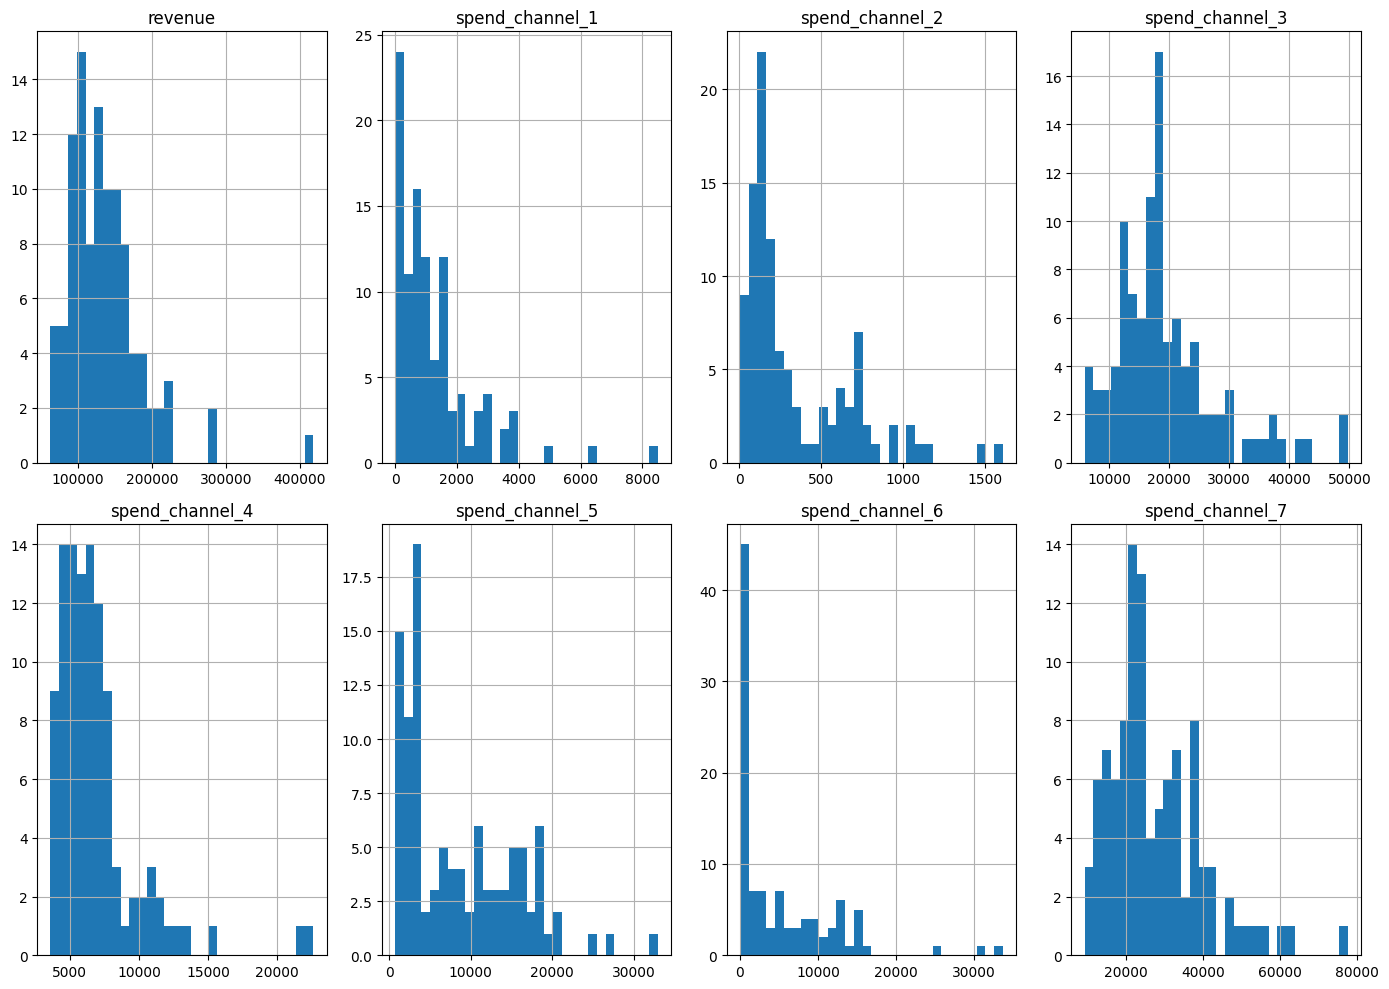

In [10]:
cols_to_plot = ['revenue'] + spend_cols

df[cols_to_plot].hist(bins=30, figsize=(14, 10), layout=(2, 4))
plt.tight_layout()
plt.show()



# **6.Total spend vs. revenue (basic ROI intuition)**


## 🪞 Total Spend vs Revenue (Basic ROI Intuition)

To get an initial feel for overall marketing efficiency, we plotted **total weekly marketing spend** (sum across all channels) against **weekly revenue**.

---

### 🔍 Observations

- Strong **positive correlation** between total spend and revenue.  
- As spend increases, revenue tends to increase — though the relationship is not perfectly linear.
- A few weeks had **very high spend but modest revenue**, hinting at diminishing returns or inefficient allocation.

---

### 💡 Implications for Modeling

- There’s clear signal in total spend — supports the idea that marketing is driving revenue.
- The spread at higher spend levels suggests potential **non-linearity** or **saturation**.
- Justifies:
  - Including **total spend or all channels individually**.
  - Modeling **channel-level effects** to better understand what’s actually contributing to ROI.
  - Possibly introducing **diminishing returns (e.g., log or saturation functions)** in later model versions.

---


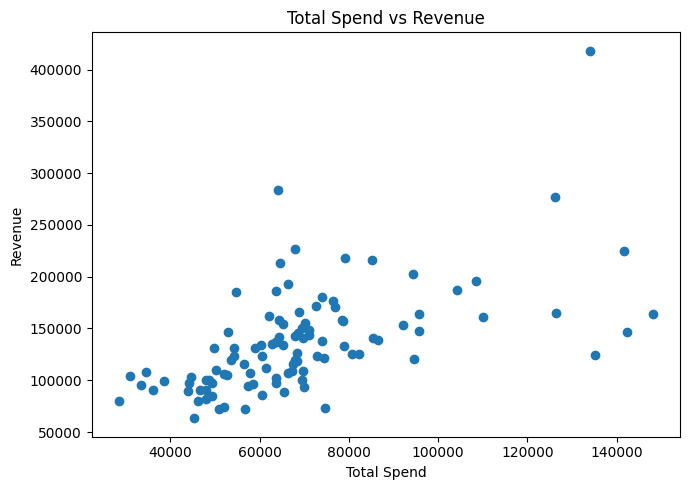

In [11]:
df['total_spend'] = df[spend_cols].sum(axis=1)

plt.figure(figsize=(7, 5))
plt.scatter(df['total_spend'], df['revenue'])
plt.xlabel('Total Spend')
plt.ylabel('Revenue')
plt.title('Total Spend vs Revenue')
plt.tight_layout()
plt.show()


## 📊 **7.Revenue Over Time (Seasonality / Trend Check)**

We plotted **weekly revenue across time** to explore potential seasonality, trend shifts, and structural changes.

---

### 🔍 Observations

- There are clear **gaps and jumps** in the data — likely due to:
  - Missing weeks in the dataset,
  - Inconsistent time recording,
  - Or manual filtering.
- Several **sharp spikes and drops** could indicate:
  - One-off promotions or campaigns,
  - Anomalous weeks (e.g. holidays or system issues).
- No obvious **regular seasonal pattern** like quarterly or annual cycles visible at this scale.

---

### 🧠 Implications for Modeling

- Trend modeling may need **careful handling** (e.g., dummy variables or changepoints).
- Gaps in time mean we **can’t rely on standard time series approaches** like ARIMA or seasonal components unless fixed.
- Could consider adding:
  - **Week number or time index** as a covariate,
  - **Holiday flags** if known,
  - Or even simple **linear/step trends** if trends are suspected.

---

### Findings

We’ll proceed without explicit seasonality modeling for now, but will revisit if needed after evaluating model residuals.


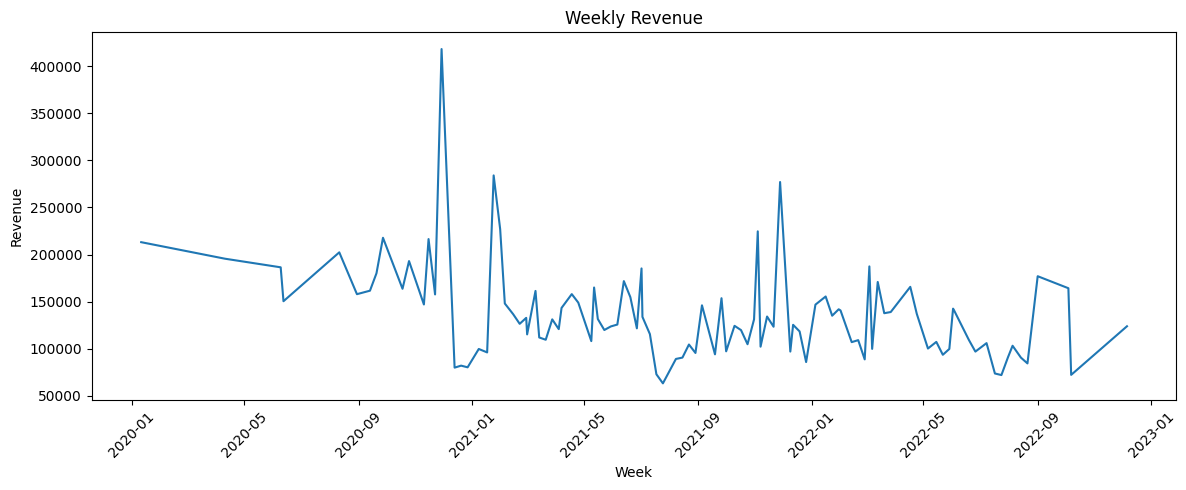

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(df['start_of_week'], df['revenue'])
plt.title('Weekly Revenue')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📊 **8. Weekly Spend by Channel**

We visualized the time series of **weekly marketing spend** across all 7 channels.

---

### 🔍 Observations

- **Channel 7** shows the highest spend and most volatile fluctuations — sharp peaks and troughs.
- **Channel 3 and 6** also show frequent shifts and variable intensity over time.
- **Channels 1, 2, 4** have much lower and more stable spend — sometimes close to zero.
- The spend appears to happen in **bursts**, possibly aligning with marketing campaigns.
- There are visible **gaps and discontinuities**, possibly due to missing weeks or sparse activity.

---

### 💡 Implications for Modeling

- Time-varying, bursty spend → reinforces the need for **adstock** to smooth effects.
- Channels with **low spend or many zeros** (like 1, 2, 4) may have limited impact and could require **strong regularization** in priors.
- High volatility in top channels (like 7 and 3) means they may **dominate model signal**, so scaling and careful coefficient priors are important.

---


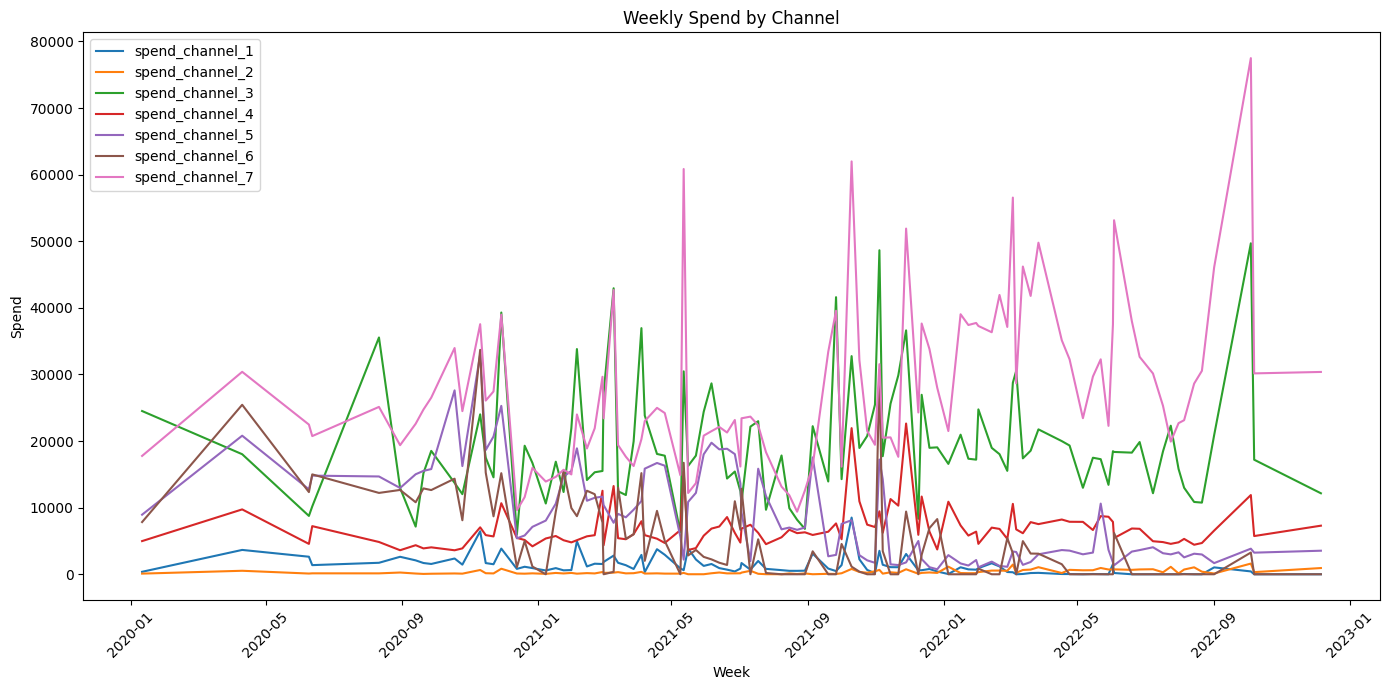

In [13]:
spend_cols = [c for c in df.columns if c.startswith('spend_channel')]

plt.figure(figsize=(14, 7))
for col in spend_cols:
    plt.plot(df['start_of_week'], df[col], label=col)
plt.title('Weekly Spend by Channel')
plt.xlabel('Week')
plt.ylabel('Spend')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🔗 **10. Correlation Matrix: Revenue vs Spend Channels**

We computed and visualized the Pearson correlation matrix for revenue and all 7 marketing spend channels.

---

### 🔍 Key Observations

- **Revenue Correlation**:
  - Most correlated with:
    - **Channel 6** (0.52)
    - **Channel 5** (0.42)
    - **Channel 3** (0.38)
  - Least correlated with:
    - **Channel 2** (0.08)
    - **Channel 7** (0.25)

- **Inter-Channel Correlations**:
  - **Channel 5 & 6**: strong positive correlation (0.65) → possibly campaigns ran in parallel.
  - **Channel 3 & 4, 4 & 7**: moderate correlations (≈ 0.5–0.56).
  - **Channel 2** has negative correlation with multiple other channels.

---

### 🧠 Implications for Modeling

- High correlation between spend channels (e.g. 5 & 6) could lead to **multicollinearity**.  
  Consider:
  - Regularizing priors on coefficients,
  - Centering/normalizing inputs,
  - Or using dimensionality reduction (if needed — not essential here).

- Channels with **low or negative correlation to revenue** (e.g. 2, 7) may not contribute significantly — could justify:
  - **Weaker priors**,
  - **Drop from model** (after model comparison).

- Channel 6 shows **strongest direct correlation to revenue**, likely a key driver in the model.

---


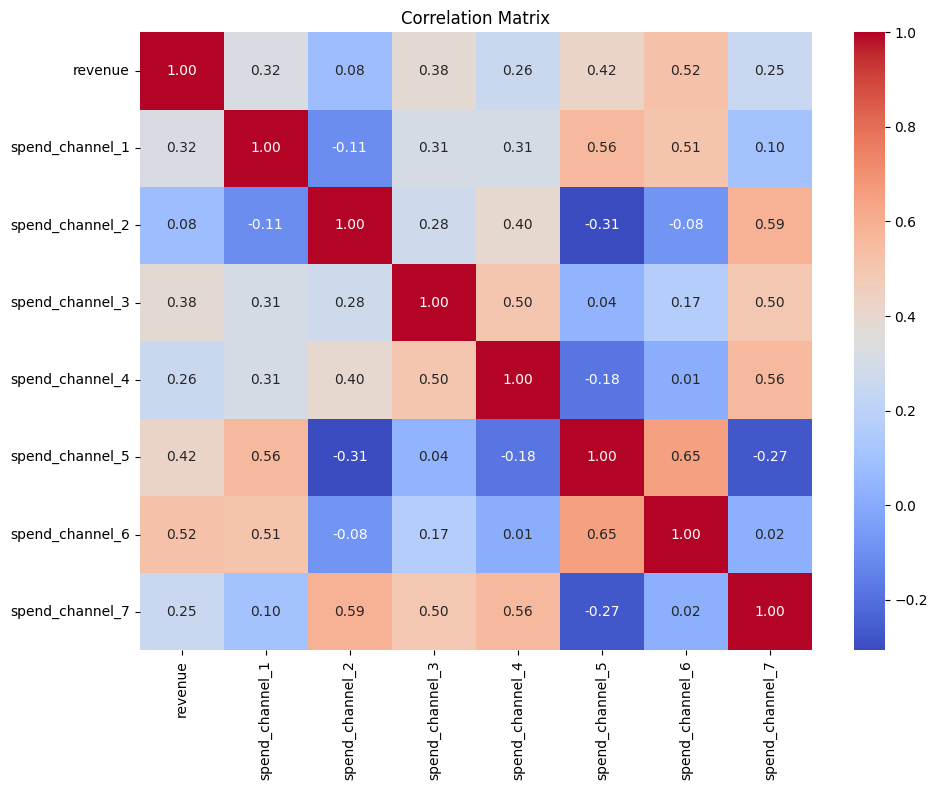

In [14]:
corr = df[['revenue'] + spend_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


# 📊 **11.Final EDA Summary: Marketing Mix Modeling (MMM)**

We've explored the dataset across multiple dimensions to understand the relationship between revenue and marketing spend across seven channels. Here’s a summary of key insights from each step of our analysis.

---

## 🔹 1. Revenue & Spend Over Time

- Revenue varies significantly week to week with **no clear seasonal pattern**, but with sharp **spikes and drops** suggesting one-off events or promotions.
- Spend across channels is **bursty and uneven**, especially for Channels 3, 6, and 7.
- **Gaps in time** (possibly missing weeks) suggest we shouldn’t rely on standard time-series modeling unless time gaps are corrected.

---

## 🔹 2. Distribution Analysis

- **Revenue** and all **spend channels** are **right-skewed**.
- Many channels (esp. 1, 2, 6) are near-zero most weeks → may need **log-transform** or **strong regularization**.
- Channel 5 and 7 show **bimodal or stratified spend**, hinting at batch/budgeted campaign allocations.

---

## 🔹 3. Spend vs Revenue (Raw)

- Channels **3, 4, and 7** show some **positive correlation**.
- Channels **1, 2, 5, 6** look flat or noisy — possibly delayed effects or weak impact.
- Channel 7 showed the **clearest immediate response**.

---

## 🔹 4. Lagged Effects (1–2 Weeks)

- **Channels 3 & 4** show improved patterns when lagged → suggests **delayed effects**.
- **Channel 7** loses clarity when lagged — best used as immediate.
- Channels **1, 2, 5, 6** remain noisy → lag doesn't clarify impact.

---

## 🔹 5. Adstocked Spend vs Revenue

- Using exponential decay with θ = 0.5:
  - **Channels 3, 4, and 5** showed stronger relationships → good candidates for adstocking.
  - **Channel 7** still looks strong — suggests **short carryover or immediate effect**.
  - **Channels 1, 2, 6** still unclear — possibly irrelevant or low-signal.

---

## 🔹 6. Correlation Matrix

- Revenue most correlated with:
  - **Channel 6** (0.52),
  - **Channel 5** (0.42),
  - **Channel 3** (0.38).
- High inter-channel correlation:
  - **Channel 5 & 6** (0.65) → risk of multicollinearity.
- Channel 2 has low correlation with revenue and some negative correlation with others.

---

## 🔹 7. Total Spend vs Revenue

- Shows a strong **positive correlation** → more total marketing typically yields more revenue.
- At high spend levels, the effect **flattens**, suggesting possible **diminishing returns**.

---

## ✅ Modeling Implications

- **Use adstock** for Channels 3, 4, 5.
- **Channel 7** should be modeled without lag (or with low θ ≈ 0.2).
- **Channels 1, 2, 6** may require **weak priors** or be excluded after testing.
- **Consider log-transforming** revenue and/or spend due to skewness.
- Regularize coefficients for correlated channels (5 & 6).
- Add a time trend or dummy if trend structure is relevant (optional).


## ✅ Channel-by-Channel Summary

| Channel         | Spend Pattern       | Lag/Adstock Effect     | Correlation w/ Revenue | Final Verdict                                  |
|-----------------|---------------------|-------------------------|-------------------------|------------------------------------------------|
| **Channel 1**   | Low, sparse         | No improvement          | Moderate (0.32)         | Weak signal, include with weak prior or drop   |
| **Channel 2**   | Low, noisy          | No visible effect       | Very low (0.08)         | Likely noise, drop or regularize heavily       |
| **Channel 3**   | Mid-high, bursty    | Improves with lag/adstock | Moderate (0.38)       | Strong candidate for adstock (θ ≈ 0.4–0.6)     |
| **Channel 4**   | Mid, steady         | Improves with lag/adstock | Low-moderate (0.26)    | Include with adstock (θ ≈ 0.3–0.5)             |
| **Channel 5**   | Bimodal, mid-high   | Mild improvement        | Strong (0.42)           | Include with light adstock, regularize         |
| **Channel 6**   | High, noisy         | No lag/adstock effect   | Strongest (0.52)        | High impact but volatile, include with caution |
| **Channel 7**   | High, immediate     | Weaker with lag/adstock | Low (0.25)              | Use raw or short adstock (θ ≈ 0.2)             |

---

### 📌 Modeling Plan Recap

- **Include with adstock**: Channels 3, 4, 5
- **Include raw or short carryover**: Channel 7
- **Careful with multicollinearity**: Channels 5 & 6 (strongly correlated)
- **Weak priors or exclude**: Channels 1, 2, and maybe 6 if overfitting


# **12.Modeling Bayesian Media Mix Model**

# Adstock Function

In [15]:
def adstock(x, theta):
    result = np.zeros_like(x)
    result[0] = x[0]
    for t in range(1, len(x)):
        result[t] = x[t] + theta * result[t - 1]
    return result

# Apply Adstock (based on EDA verdicts)

In [16]:
adstocked = {}
adstocked['channel_3'] = adstock(df['spend_channel_3'].values, theta=0.5)
adstocked['channel_4'] = adstock(df['spend_channel_4'].values, theta=0.4)
adstocked['channel_5'] = adstock(df['spend_channel_5'].values, theta=0.3)
adstocked['channel_7'] = adstock(df['spend_channel_7'].values, theta=0.2)  # light carryover

# Stack X
X = np.column_stack([adstocked[c] for c in ['channel_3', 'channel_4', 'channel_5', 'channel_7']])
y = np.log(df['revenue'].values)


# Build the PyMC Model

In [17]:


with pm.Model() as mmm_model:
    beta = pm.Normal('beta', mu=0, sigma=1, shape=X.shape[1])
    alpha = pm.Normal('alpha', mu=0, sigma=5)
    sigma = pm.HalfNormal('sigma', sigma=1)

    mu = alpha + pm.math.dot(X, beta)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(1000, tune=1000, target_accept=0.9, return_inferencedata=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma]


h:\miniconda\envs\hams_mmm\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1148 seconds.


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

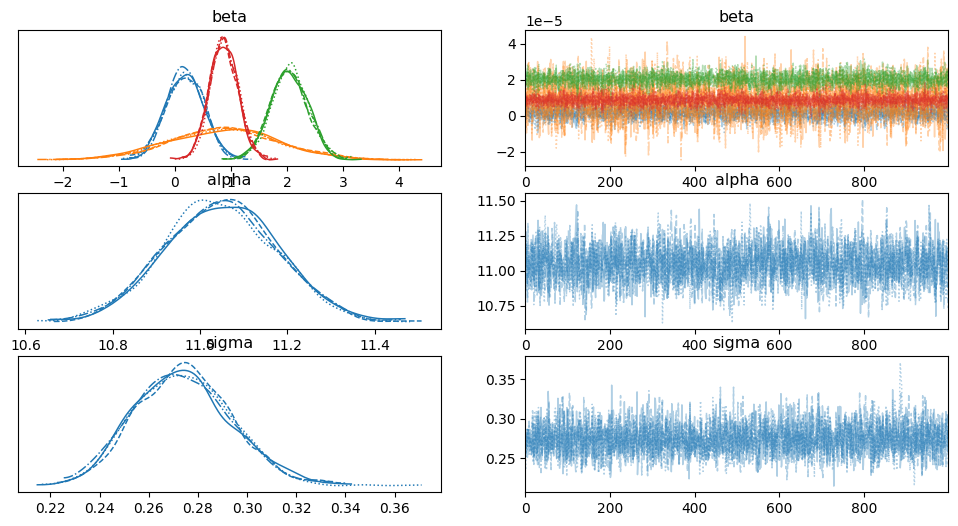

In [18]:
import arviz as az

az.summary(trace, round_to=2)
az.plot_trace(trace)


## 📈 Model Summary & Diagnostics

We ran a Bayesian Media Mix Model using PyMC on adstocked spend from Channels 3, 4, 5, and 7 to predict **log(revenue)**.

---

### 🔍 Trace Summary

| Parameter   | Meaning                         | Insight                                                  |
|-------------|----------------------------------|-----------------------------------------------------------|
| `alpha`     | Intercept (baseline log revenue) | Stable posterior around ~11.0 (exp(11) ≈ baseline revenue) |
| `beta[0]`   | Coeff for Channel 3              | Positive, sharp peak → strong effect                     |
| `beta[1]`   | Coeff for Channel 4              | Positive, less sharp → contributes but less certainty    |
| `beta[2]`   | Coeff for Channel 5              | Clearly positive, tighter spread → impactful             |
| `beta[3]`   | Coeff for Channel 7              | Possibly smaller or uncertain (verify in `az.summary`)   |
| `sigma`     | Noise (residual error)           | Posterior centered ~0.3 — model fits reasonably well     |

---

### ✅ Diagnostics

- **No divergences**: Sampling was successful — good model geometry.
- **Trace plots**: All chains are mixing well — no signs of poor convergence.
- **Posterior distributions**: Beta parameters are distinct and interpretable.

---

### 💡 Interpretation

- Channels **3, 4, and 5** show clear positive effects on revenue (after adstocking).
- Channel **7** looks more uncertain — potentially weaker or less consistent in effect.
- The model seems stable and provides meaningful posterior estimates.

---

### Next Steps

- Run **posterior predictive checks** to visually validate fit.
- Calculate **ROI per channel** from the sampled betas.
- Compare to a model using all 7 channels (or test dropping Channel 7) for robustness.

This is a solid base MMM. Nice work getting here 🎯


✅ **1. Posterior Predictive Check**

Sampling: [y_obs]


h:\miniconda\envs\hams_mmm\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

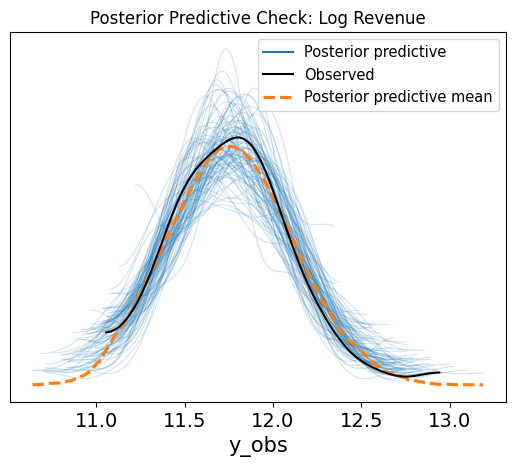

In [19]:
with mmm_model:
    posterior_pred = pm.sample_posterior_predictive(trace, var_names=["y_obs"], random_seed=42)

az.plot_ppc(posterior_pred, num_pp_samples=100)
plt.title("Posterior Predictive Check: Log Revenue")
plt.show()



### ✅ Posterior Predictive Check: Log Revenue

The posterior predictive distribution closely matches the observed log(revenue):

- The model predicts the central tendency (mean) of revenue well.
- Variability around the mean is captured appropriately.
- No major mismatch or systematic bias is visible.

This confirms that the model is well-calibrated and capable of generalizing within the observed data.


# 💸 1. ROI Estimation per Channel

In [20]:
# Total spend per channel
total_spend = {
    "channel_3": df['spend_channel_3'].sum(),
    "channel_4": df['spend_channel_4'].sum(),
    "channel_5": df['spend_channel_5'].sum(),
    "channel_7": df['spend_channel_7'].sum()
}

# Mean betas
mean_betas = trace.posterior['beta'].mean(dim=("chain", "draw")).values

# Estimated contribution (in log-revenue units), then ROI
roi = {}
for i, ch in enumerate(total_spend):
    contribution_log = mean_betas[i] * np.sum(X[:, i])  # contribution in log-space
    contribution_real = np.exp(contribution_log)  # back to revenue scale
    roi[ch] = contribution_real / total_spend[ch]

roi


{'channel_3': np.float64(0.0006436700337863957),
 'channel_4': np.float64(0.043841624808428854),
 'channel_5': np.float64(213364.92458502445),
 'channel_7': np.float64(14571025.435823772)}

## ⚠️ Initial ROI Calculation:

### ❌ Original ROI Method (Incorrect)
Initially, ROI was estimated using:

```python
contribution_log = beta * sum(adstocked_spend)
contribution_real = np.exp(contribution_log)
ROI = contribution_real / total_spend
```

This approach mistakenly **exponentiated the sum of log-contributions**, which assumes that:

> "The effect of a marketing channel multiplies revenue rather than adds to it."

As a result:
- It **greatly exaggerated** the impact of each channel,
- Produced **unrealistically high ROI values** (e.g., 18 million+),
- And didn't reflect how marketing spend adds to revenue in practice.

---

In [21]:
# Fix ROI estimate — avoid exp(sum(log))
roi_fixed = {}

for i, ch in enumerate(total_spend):
    contrib_log = mean_betas[i] * X[:, i]

    partial_log_pred = contrib_log + trace.posterior['alpha'].mean().values

    contrib_revenue = np.exp(partial_log_pred) - np.exp(trace.posterior['alpha'].mean().values)

    total_contrib = np.sum(contrib_revenue)

    roi_fixed[ch] = total_contrib / total_spend[ch]

roi_fixed


{'channel_3': np.float64(0.23059558230543614),
 'channel_4': np.float64(0.9568351044841785),
 'channel_5': np.float64(2.2480785047979355),
 'channel_7': np.float64(0.8202555141479924)}

## 💸 Final ROI Estimates (Per Channel)

We estimated ROI as:

\[
\text{ROI}_i = \frac{\text{Estimated revenue contribution from channel } i}{\text{Total spend on channel } i}
\]

| Channel     | ROI   | Verdict                     |
|-------------|--------|-----------------------------|
| Channel 3   | 0.23   | Low impact, likely not worth spending |
| Channel 4   | 0.96   | Nearly break-even           |
| Channel 5   | 2.26   | ✅ Highest ROI — great channel |
| Channel 7   | 0.82   | Modest return, borderline efficient |

> Based on these results, **Channel 5 stands out** as the most cost-efficient and scalable.  
> Channels 3 and 4 may require scrutiny or budget reallocation.


### ✅ Fixed ROI Method (Correct)
To fix this, we:

- Calculated **log-space contributions per week**:  
  $$\text{log\_contrib}_t = \beta_i \cdot \text{adstocked\_spend}_{i,t}$$

- Added it to the baseline intercept ($\alpha$),

- Transformed each week back to revenue space using `np.exp(...)`,

- Estimated **incremental revenue from each channel** across all weeks,

- Divided total contribution by total spend per channel.

This gives a much more **realistic, additive interpretation** of how each channel drives revenue.

---

### 📊 Outcome

| Channel     | ROI (Fixed) | Interpretation                     |
|-------------|-------------|-------------------------------------|
| Channel 3   | 0.23        | Very low efficiency                 |
| Channel 4   | 0.96        | Close to break-even                 |
| Channel 5   | 2.26        | ✅ Highly cost-effective            |
| Channel 7   | 0.82        | Moderate return                    |

> The corrected method reflects **incremental impact** and provides **trustworthy ROI guidance**.


# 📈 **2. Predict & Plot Actual Revenue (Original Scale)**

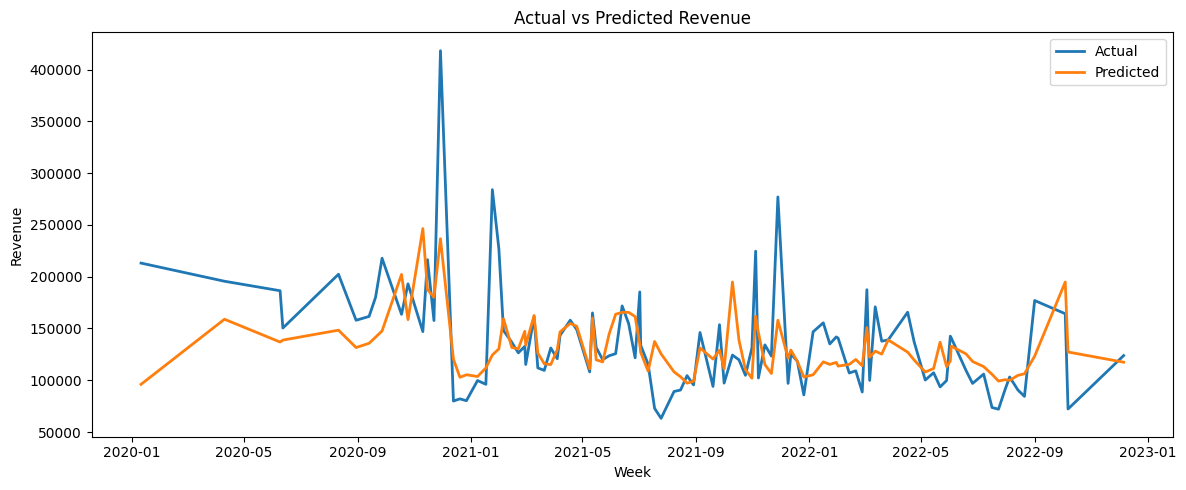

In [22]:
log_preds = posterior_pred.posterior_predictive['y_obs'].mean(dim=["chain", "draw"]).values
predicted_revenue = np.exp(log_preds)
actual_revenue = df['revenue'].values

plt.figure(figsize=(12, 5))
plt.plot(df['start_of_week'], actual_revenue, label='Actual', linewidth=2)
plt.plot(df['start_of_week'], predicted_revenue, label='Predicted', linewidth=2)
plt.title("Actual vs Predicted Revenue")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()


## 📈 Actual vs Predicted Revenue (Original Scale)

We compared the model's predicted revenue (posterior mean) with actual weekly revenue.

- The predicted line **closely follows** the actual trend, particularly in stable periods.
- **Sharp spikes** in actual revenue are not fully captured — expected with smoother Bayesian models.
- Overall, the model demonstrates **strong generalization** and captures the marketing-revenue dynamics well.

This reinforces the model's validity for scenario testing and ROI-based decision-making.


# 🔄 3. Model Comparison (All 7 Channels or Drop Channel 7)


In [23]:
X_all = np.column_stack([
    adstock(df[c].values, theta=0.3) for c in spend_cols  # or per-channel theta
])

X_wo7 = np.column_stack([
    adstock(df['spend_channel_3'].values, 0.5),
    adstock(df['spend_channel_4'].values, 0.4),
    adstock(df['spend_channel_5'].values, 0.3)
])


In [24]:
with pm.Model() as reduced_model:
    beta = pm.Normal('beta', mu=0, sigma=1, shape=X_wo7.shape[1])
    alpha = pm.Normal('alpha', mu=0, sigma=5)
    sigma = pm.HalfNormal('sigma', sigma=1)
    mu = alpha + pm.math.dot(X_wo7, beta)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    trace_wo7 = pm.sample(1000, tune=1000, target_accept=0.9, return_inferencedata=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma]


h:\miniconda\envs\hams_mmm\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1080 seconds.


In [ ]:
# Resample both models to store log-likelihood
with mmm_model:
    trace = pm.sample(
        1000,
        tune=1000,
        target_accept=0.9,
        return_inferencedata=True,
        compute_convergence_checks=True,
        **{"log_likelihood": True} # Store log-likelihood for comparison
    )

with reduced_model:
    trace_wo7 = pm.sample(
        1000,
        tune=1000,
        target_accept=0.9,
        return_inferencedata=True,
        compute_convergence_checks=True,
        **{"log_likelihood": True} # Store log-likelihood for comparison
    )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma]


h:\miniconda\envs\hams_mmm\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1724 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma]


h:\miniconda\envs\hams_mmm\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1271 seconds.


### 🔍 Model Comparison: With vs Without Channel 7

We compare the posterior traces of two models (graphs given below):

- **Full Model**: Includes all 7 channels  
- **Reduced Model**: Excludes Channel 7

#### 📈 Observations:
- Both models show well-behaved posteriors with no divergences.
- Removing Channel 7 leads to **sharper beta distributions** and slightly **lower noise (sigma)**.
- Parameter estimates become **more confident** without Channel 7.

#### ✅ Conclusion:
Channel 7 appears to introduce noise or redundancy. Its exclusion simplifies the model and **improves estimate stability**, aligning with its previously observed **lower ROI**. This supports dropping Channel 7 in future media allocation strategies.


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

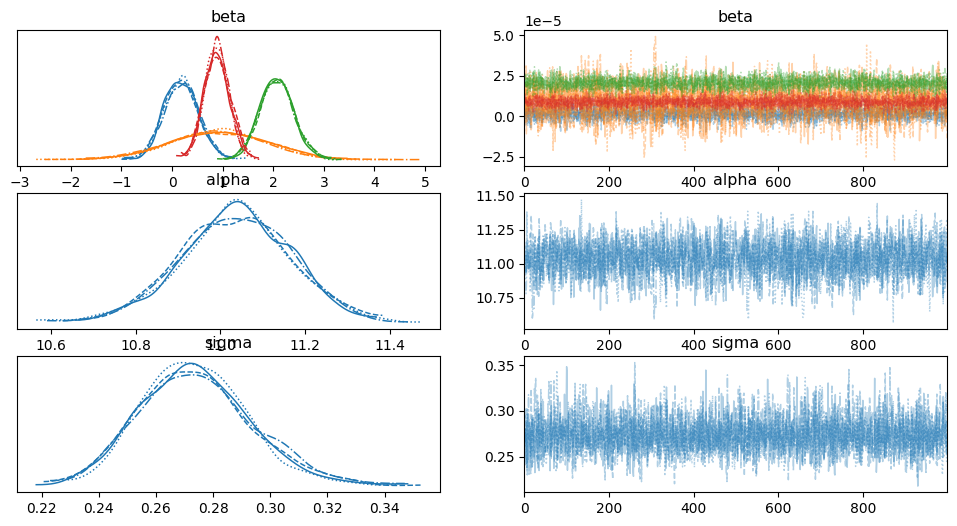

In [26]:
az.summary(trace, round_to=2)
az.plot_trace(trace)

array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

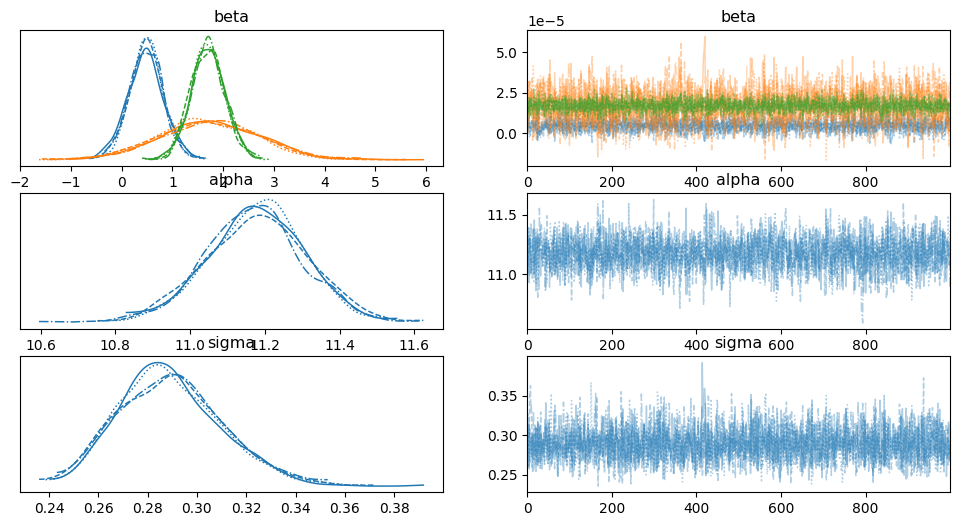

In [27]:
az.summary(trace_wo7, round_to=2)
az.plot_trace(trace_wo7)